# Clean NC Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

sys.path.append("..")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

from config import ROOT
os.chdir(ROOT)

/Users/songshgeo/opt/anaconda3/envs/WAInstitution_YRB_2021/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import xarray as xr
import numpy as np

file_path = "data/source/natural/prec_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc"

ds = xr.open_dataset(file_path)
ds
ds.prec

<xarray.Dataset>
Dimensions:  (lon: 700, lat: 400, time: 40)
Coordinates:
  * lon      (lon) float32 70.05 70.15 70.25 70.35 ... 139.6 139.8 139.9 140.0
  * lat      (lat) float32 15.05 15.15 15.25 15.35 ... 54.65 54.75 54.85 54.95
  * time     (time) datetime64[ns] 1979-07-02T10:30:00 ... 2018-07-02T10:30:00
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Created at 2016-04-02 14:55:55 UTC by the ITPCAS Data Fusio...
    source:       ITPCAS Data Fusion System (Version: 01.02.0240)
    institution:  Institute of Tibetan Plateau Research, Chinese Academy of S...
    title:        Yearly mean precipitation rate from the ITPCAS China Meteor...
    description:  Data from ITPCAS China Meteorological Forcing Dataset (Vers...
    references:   He, J., and K. Yang, 2011: China Meteorological Forcing Dat...
    frequency:    year

<xarray.DataArray 'prec' (time: 40, lat: 400, lon: 700)>
[11200000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 70.05 70.15 70.25 70.35 ... 139.6 139.8 139.9 140.0
  * lat      (lat) float32 15.05 15.15 15.25 15.35 ... 54.65 54.75 54.85 54.95
  * time     (time) datetime64[ns] 1979-07-02T10:30:00 ... 2018-07-02T10:30:00
Attributes:
    long_name:  Precipitation rate
    units:      mm hr-1

In [4]:
import xarray as xr
import numpy as np

file_path = "data/source/natural/temp_CMFD_V0106_B-01_01yr_010deg_1979-2018.nc"

ds = xr.open_dataset(file_path)
ds
ds.temp

<xarray.Dataset>
Dimensions:  (lon: 700, lat: 400, time: 40)
Coordinates:
  * lon      (lon) float32 70.05 70.15 70.25 70.35 ... 139.6 139.8 139.9 140.0
  * lat      (lat) float32 15.05 15.15 15.25 15.35 ... 54.65 54.75 54.85 54.95
  * time     (time) datetime64[ns] 1979-07-02T10:30:00 ... 2018-07-02T10:30:00
Data variables:
    temp     (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Created at 2016-04-02 04:00:01 UTC by the ITPCAS Data Fusio...
    source:       ITPCAS Data Fusion System (Version: 01.02.0240)
    institution:  Institute of Tibetan Plateau Research, Chinese Academy of S...
    title:        Yearly mean near surface air temperature from the ITPCAS Ch...
    description:  Data from ITPCAS China Meteorological Forcing Dataset (Vers...
    references:   He, J., and K. Yang, 2011: China Meteorological Forcing Dat...
    frequency:    year

<xarray.DataArray 'temp' (time: 40, lat: 400, lon: 700)>
[11200000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 70.05 70.15 70.25 70.35 ... 139.6 139.8 139.9 140.0
  * lat      (lat) float32 15.05 15.15 15.25 15.35 ... 54.65 54.75 54.85 54.95
  * time     (time) datetime64[ns] 1979-07-02T10:30:00 ... 2018-07-02T10:30:00
Attributes:
    long_name:  Near surface air temperature
    units:      K

<AxesSubplot:>

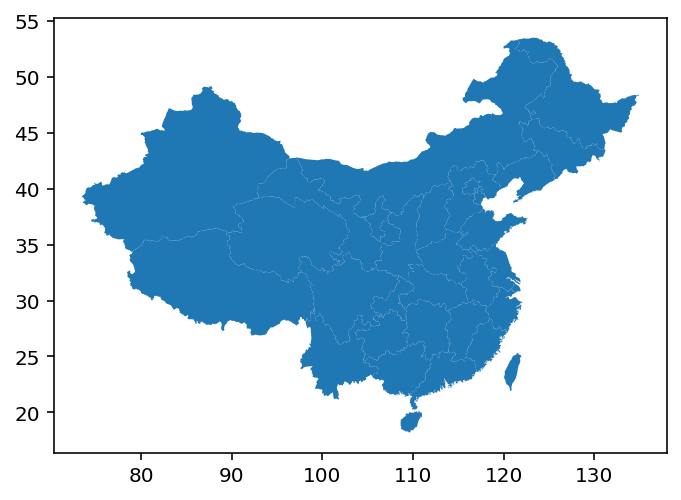

In [3]:
import geopandas as gpd
from func.tools import within_province_mask


provinces = gpd.read_file("data/source/natural/省级行政区.shp")
provinces = provinces.to_crs('epsg:4326') 
provinces.plot()

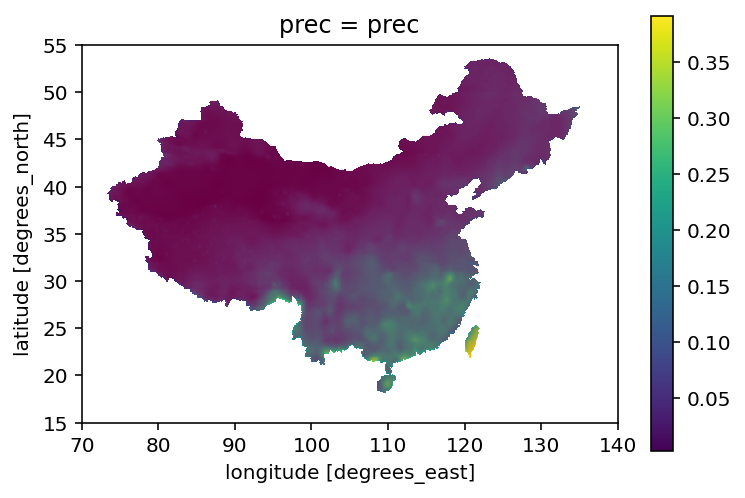

In [4]:
ds_mean = ds.to_array('prec').mean(dim='time')
ax = provinces.plot(alpha=0.2, color='red', zorder=0.5)
ds_mean.plot(ax=ax, zorder=-1)

In [5]:
prec = within_province_mask(provinces, ds, "prec", longitude='lon', latitude='lat')
prec.head()

,黑龙江,新疆,山西,宁夏,西藏,山东,河南,江苏,安徽,湖北,...,陕西,内蒙古,重庆,河北,上海,北京,台湾,香港,澳门,四川
1979,0.045406,0.011438,0.054298,0.036681,0.042528,0.079852,0.105216,0.112441,0.130112,0.126466,...,0.067929,0.035352,0.142128,0.062918,0.096928,0.073253,0.200431,0.211564,NaN,0.096645
1980,0.059132,0.011288,0.053184,0.022232,0.050681,0.074532,0.093153,0.124223,0.161948,0.160994,...,0.075853,0.029086,0.150722,0.048876,0.152085,0.045723,0.190280,0.222814,NaN,0.104754
1981,0.069501,0.014324,0.054190,0.030670,0.041457,0.050448,0.073998,0.103497,0.141968,0.112441,...,0.087452,0.033283,0.118140,0.048290,0.122605,0.039900,0.244420,0.189689,NaN,0.107471
1982,0.055140,0.011642,0.058785,0.018854,0.040213,0.070904,0.101494,0.104750,0.140146,0.145959,...,0.070291,0.028877,0.164585,0.054813,0.125262,0.062747,0.219770,0.297501,NaN,0.098334
1983,0.067433,0.010991,0.062131,0.036031,0.040574,0.063524,0.106398,0.119264,0.170174,0.177344,...,0.101714,0.034943,0.155073,0.052117,0.157293,0.050550,0.322700,0.263438,NaN,0.105297


In [6]:
prec_yr = prec * 365 * 24
prec_yr.to_csv("data/processed/prec.csv")

## All data

In [10]:
from func.tools import show_files
import tqdm

nc_files = show_files(path='data/source/natural/', full_path=True, suffix='nc')
datasets = {}
for file in tqdm.tqdm(nc_files):
    ds = xr.open_dataset(file)
    for var in ds.data_vars.keys():
        dataset = within_province_mask(provinces, ds, var, longitude='lon', latitude='lat')
        long_name = ds.get(var).long_name
        if var == 'prec':
            dataset = dataset * 365 * 24  # precipitation rate -> precipitation
        dataset.to_csv(f"data/processed/{var}.csv")
        datasets[var] = long_name
        
datasets.keys()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:23<00:00,  3.35s/it]


dict_keys(['prec', 'temp', 'lrad', 'srad', 'wind', 'pres', 'shum'])

In [9]:
datasets

{'prec': 'Precipitation rate',
 'temp': 'Near surface air temperature',
 'lrad': 'Surface downward longwave radiation',
 'srad': 'Surface downward shortwave radiation',
 'wind': 'Near surface wind speed',
 'pres': 'Near surface air pressure',
 'shum': 'Near surface air specific humidity'}